# Instructions:
# Support Vector Machines 
---
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

### Data: Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

### Complete the Tasks in bold

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
user_knowledge_modeling = fetch_ucirepo(id=257) 
  
# data (as pandas dataframes) 
X = user_knowledge_modeling.data.features 
y = user_knowledge_modeling.data.targets 
  
# metadata 
print(user_knowledge_modeling.metadata) 
  
# variable information 
print(user_knowledge_modeling.variables) 


{'uci_id': 257, 'name': 'User Knowledge Modeling', 'repository_url': 'https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling', 'data_url': 'https://archive.ics.uci.edu/static/public/257/data.csv', 'abstract': "It is the real dataset about the students' knowledge status about the subject of Electrical DC Machines. The dataset had been obtained from Ph.D. Thesis.", 'area': 'Computer Science', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 403, 'num_features': 5, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['UNS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5231X', 'creators': ['Hamdi Kahraman', 'Ilhami Colak', 'Seref Sagiroglu'], 'intro_paper': {'title': 'The development of intuitive knowledge classifier and the modeling of domain dependent data', 'authors': 'H. Kahraman, Ş. Sağiroğ

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

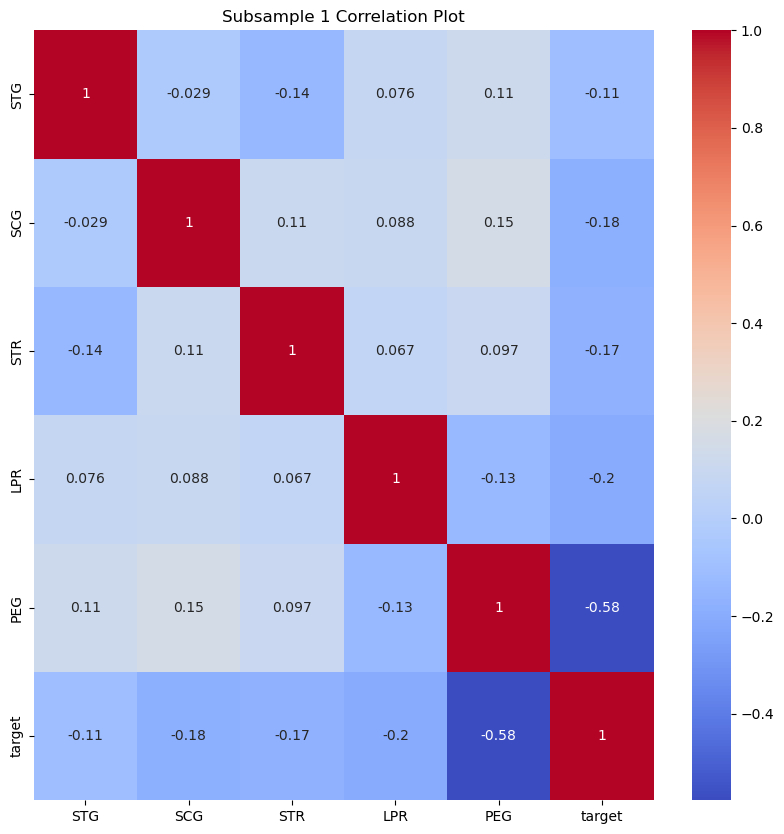

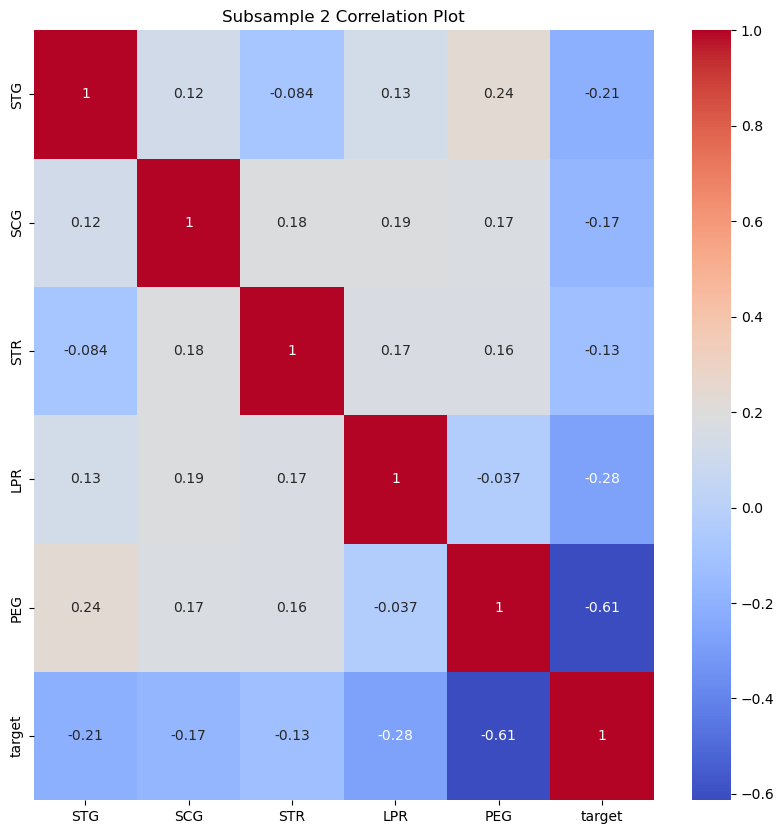

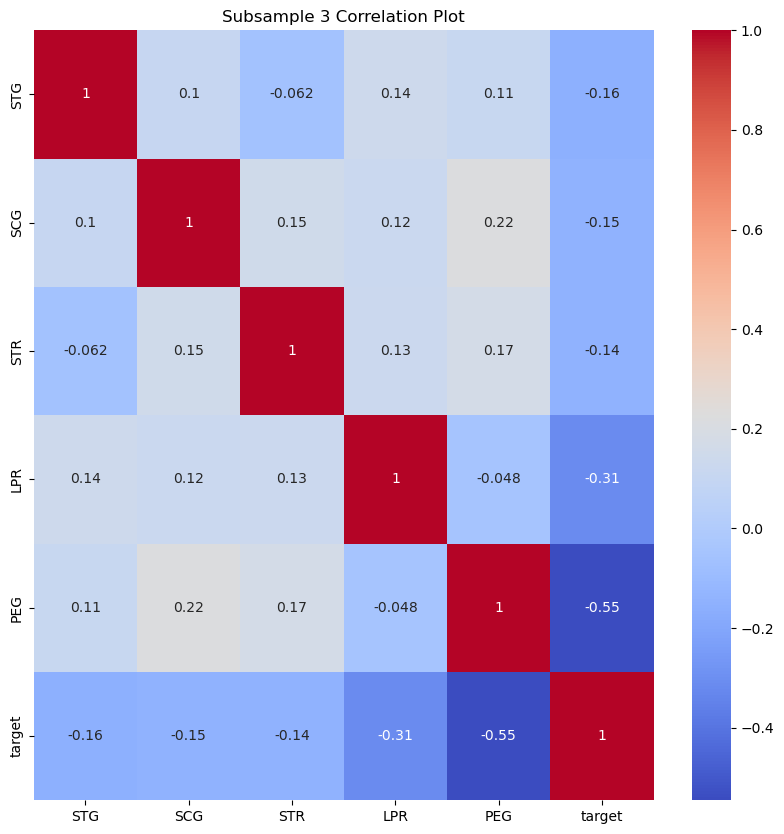

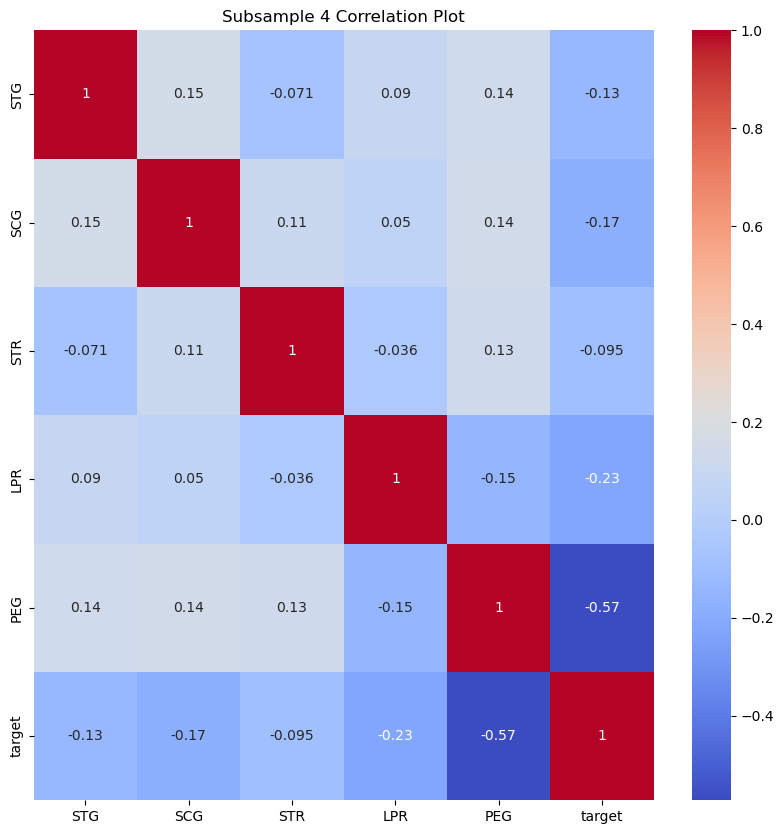

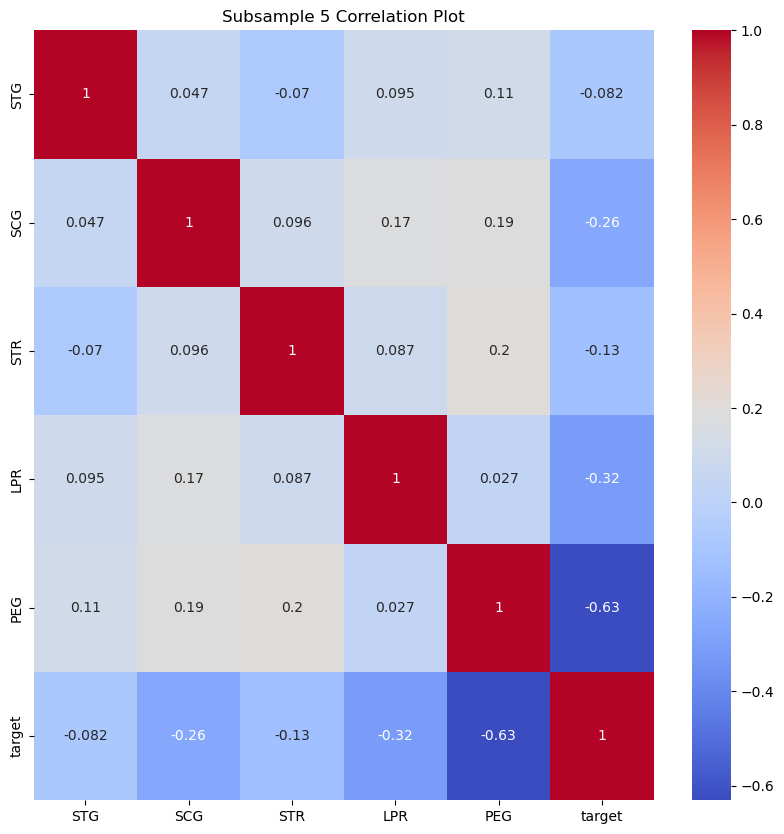

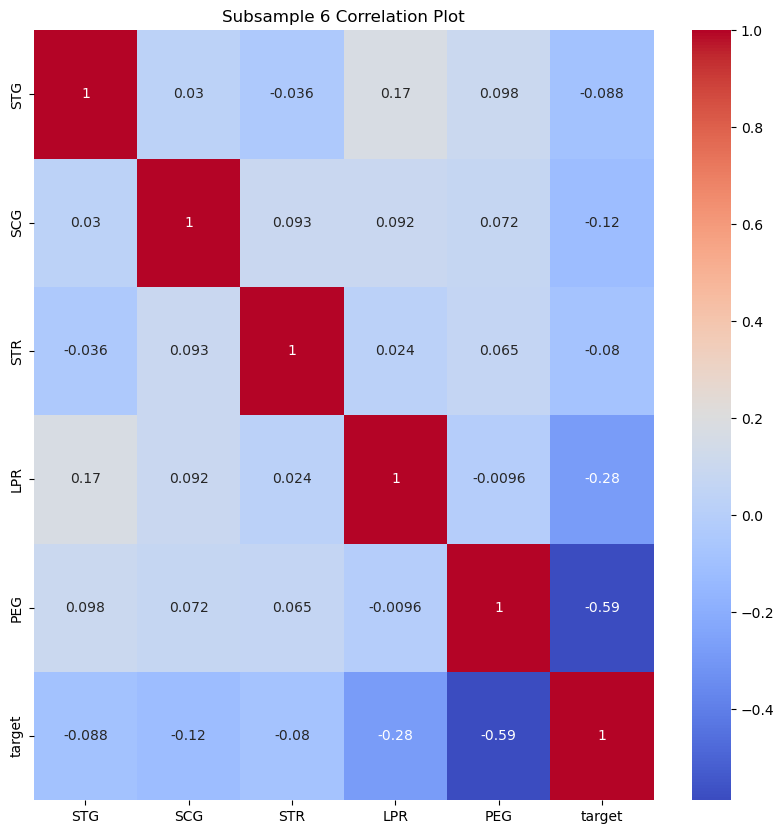

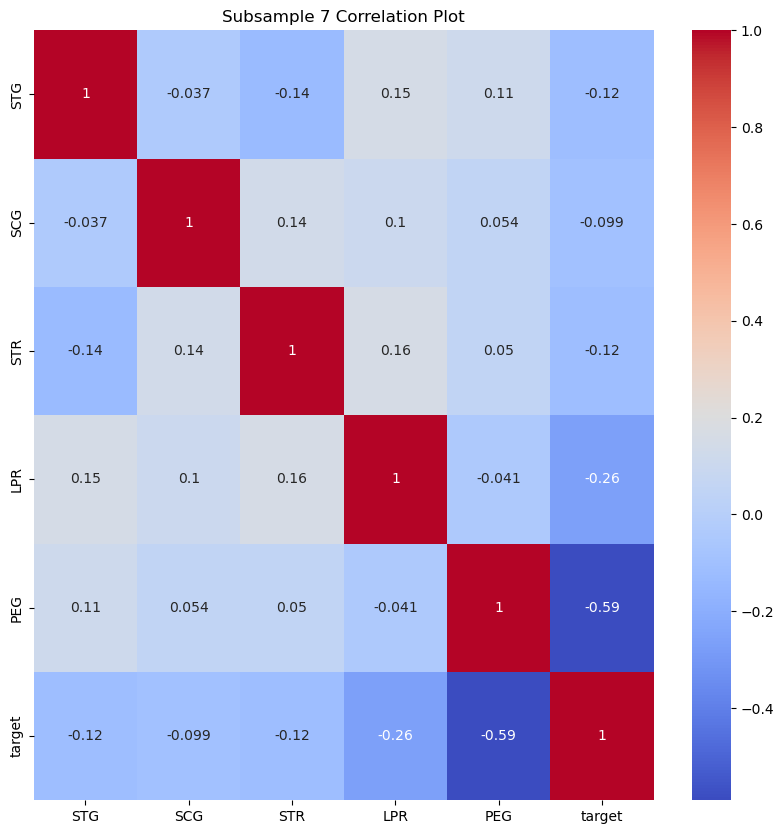

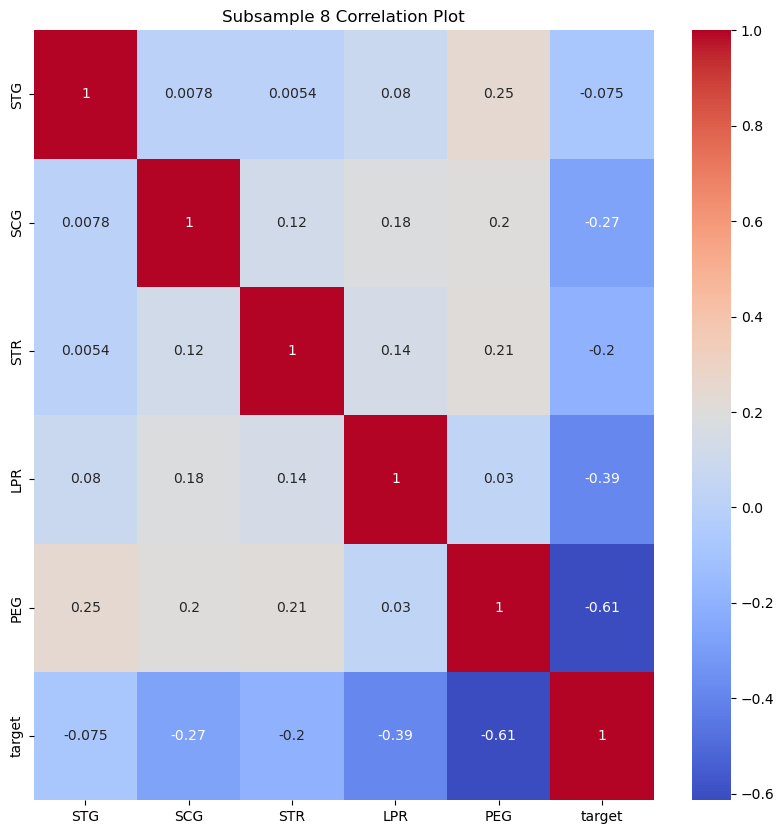

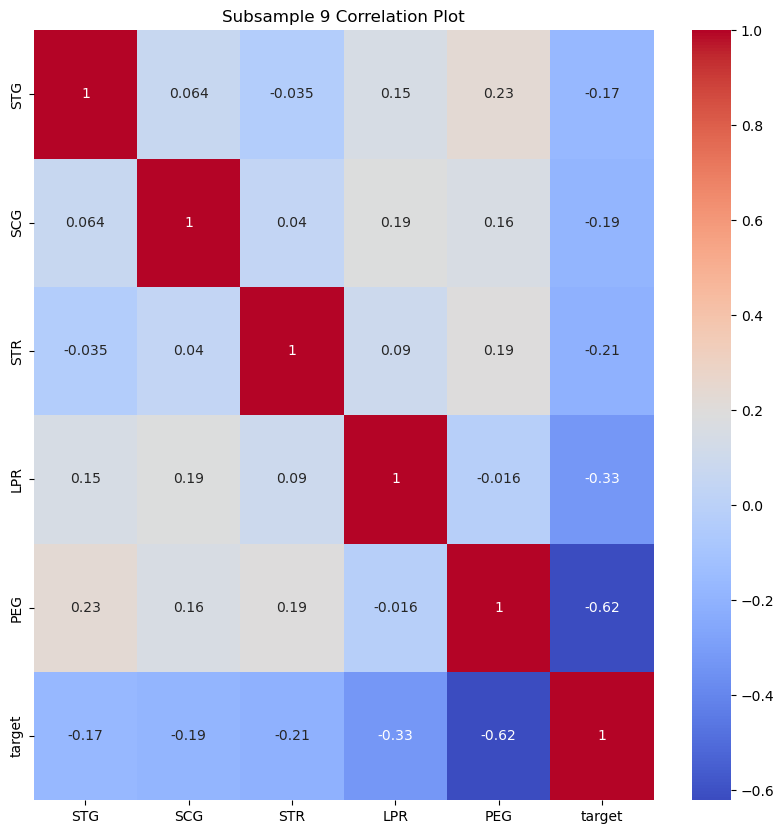

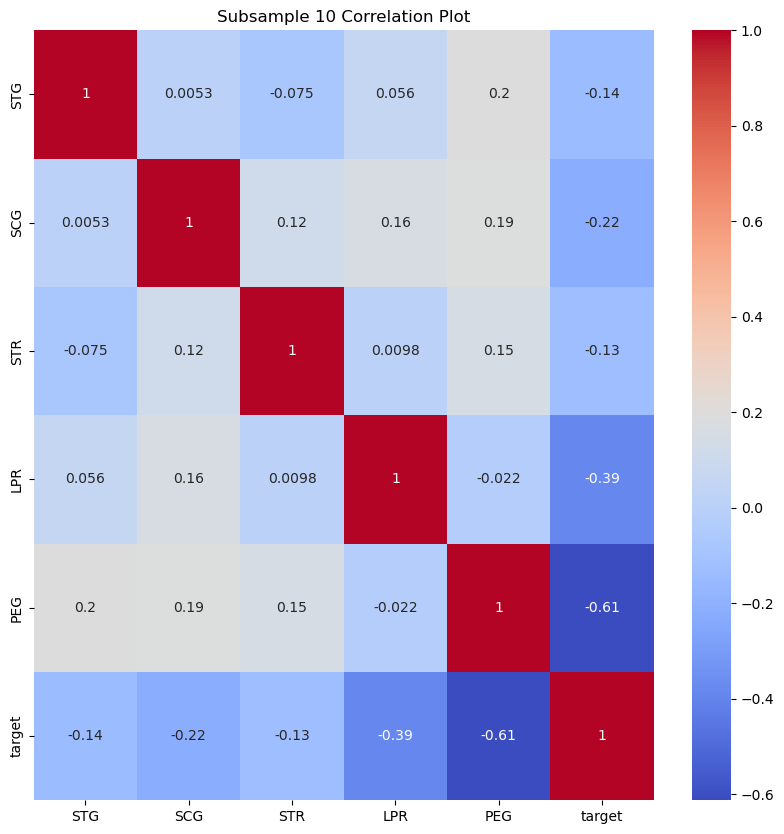

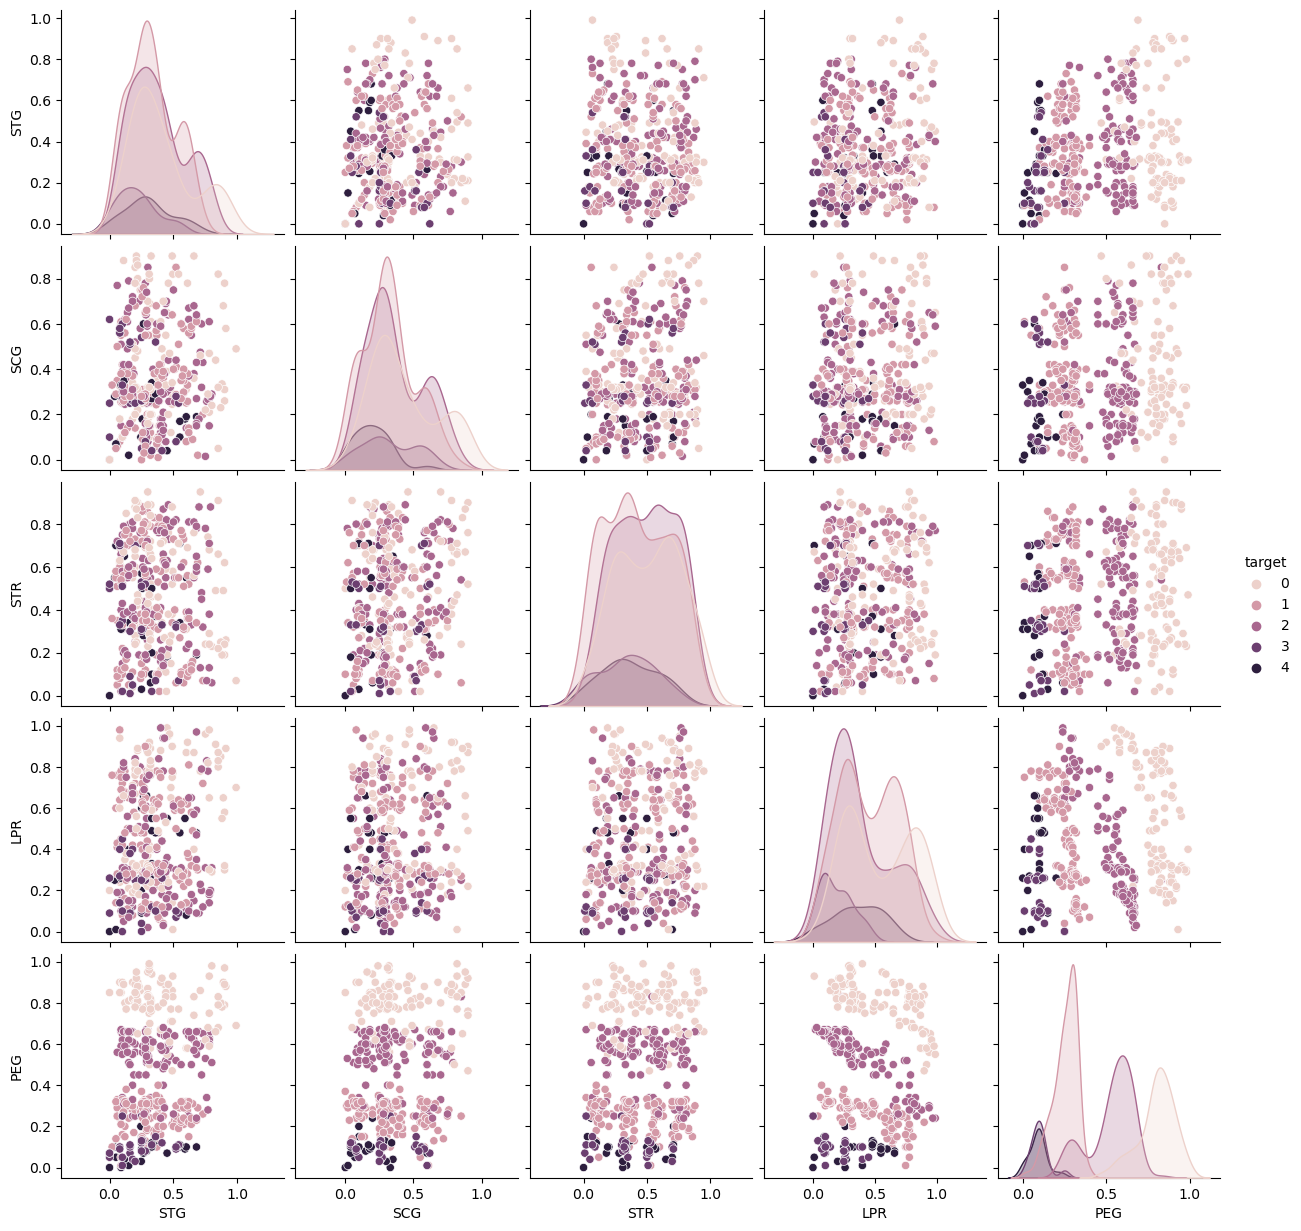

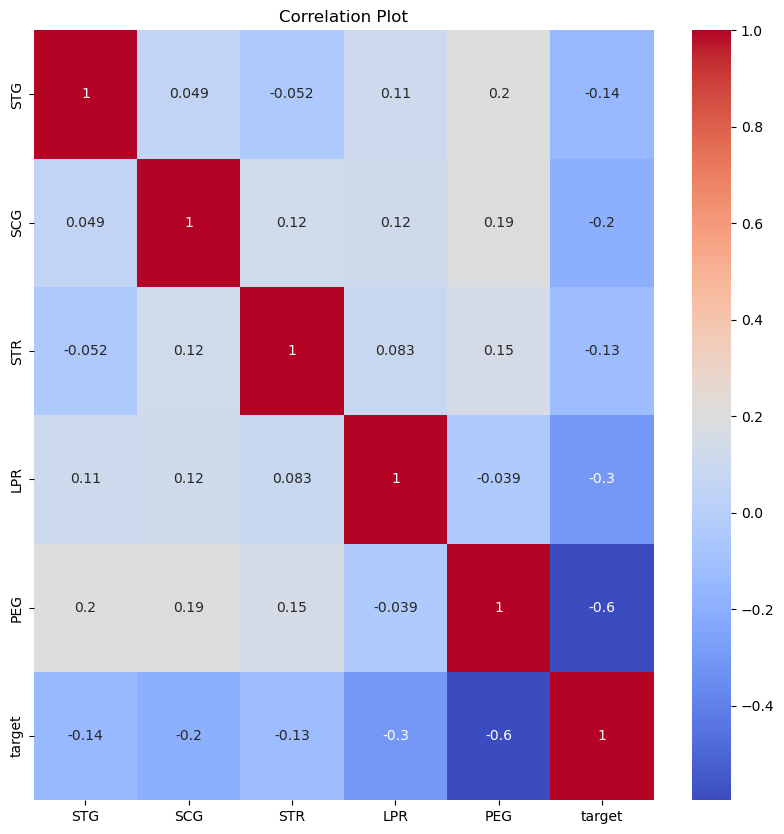

In [3]:
#**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Due to y being categorical, we will need to label encode it 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())


# Create 10 subsamples
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    df = pd.DataFrame(X_train)
    df['target'] = y_train
    corr = df.corr()
    plt.figure(figsize=(10,10))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Subsample {i+1} Correlation Plot')
    plt.show()

#**TASK: Create a pairplot of the dataset.**
df = pd.DataFrame(X)
df['target'] = y
sns.pairplot(df, hue='target')
plt.show()

#**TASK: Create a heatmap of the correlation between the variables in the dataset.**
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

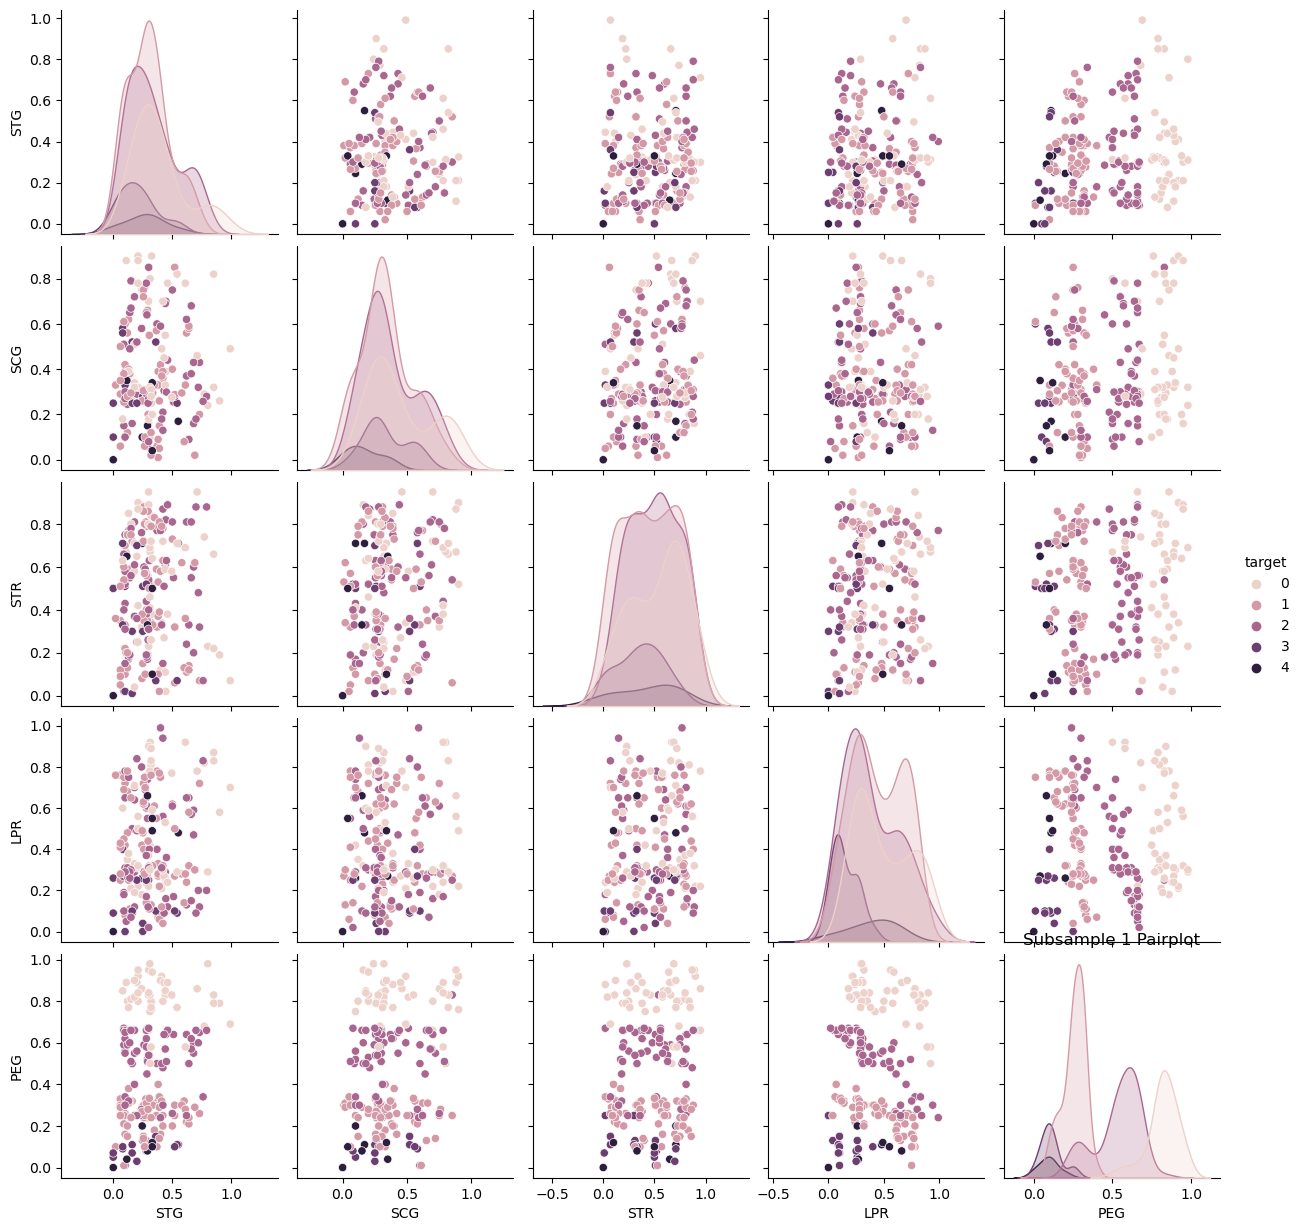

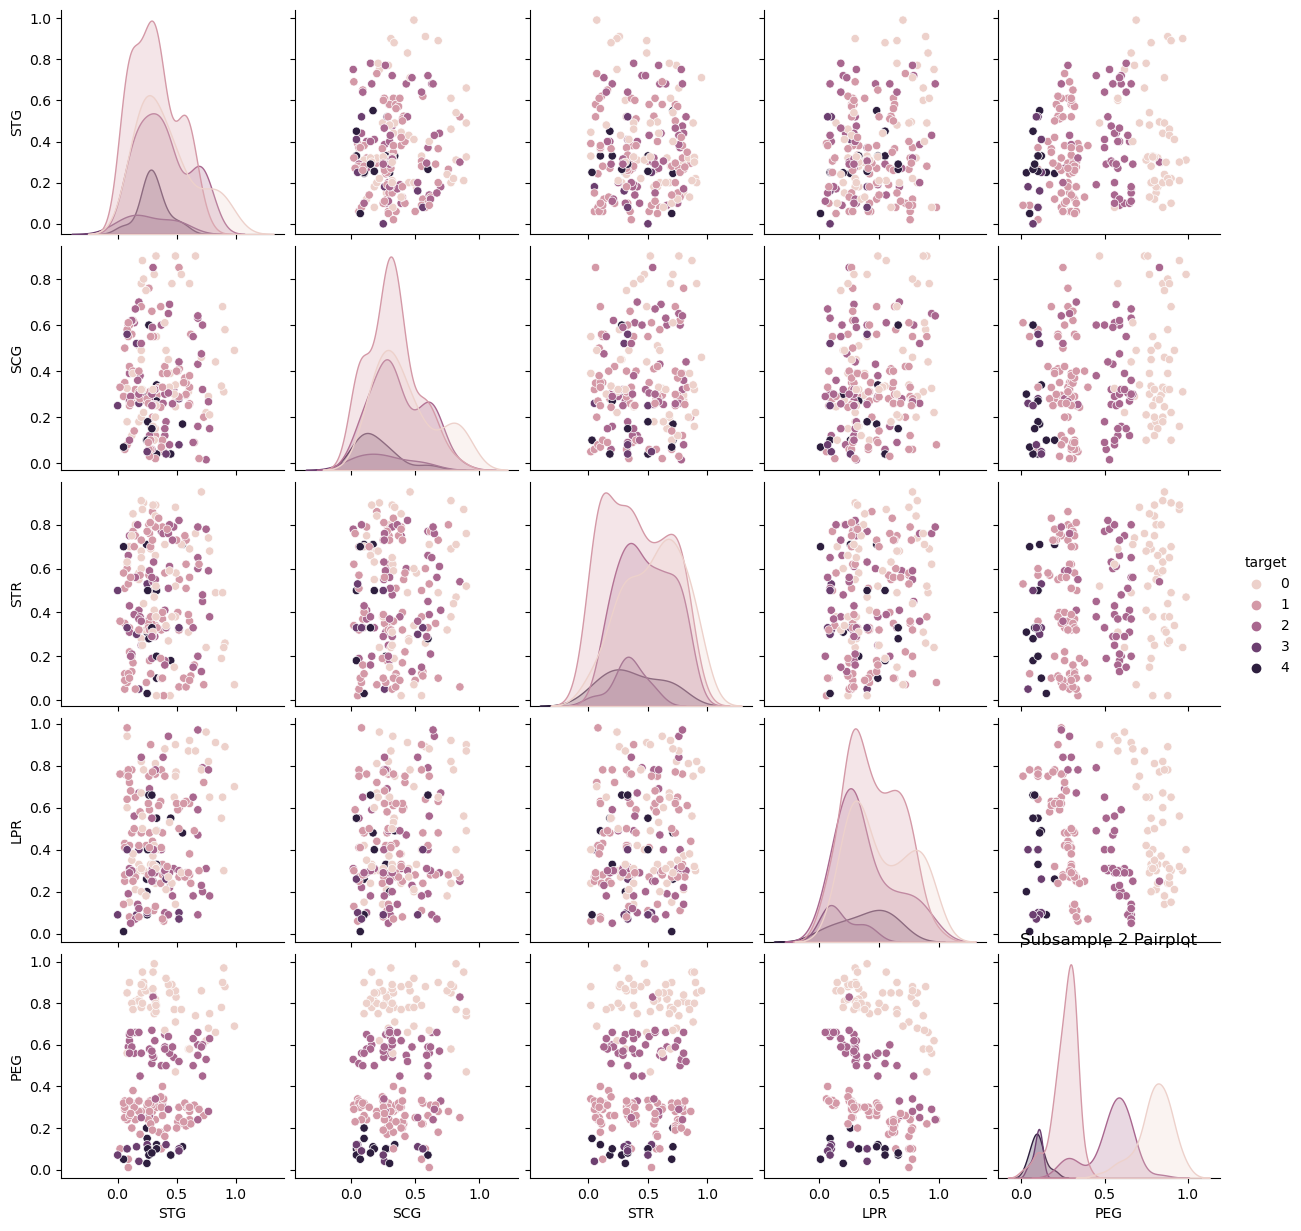

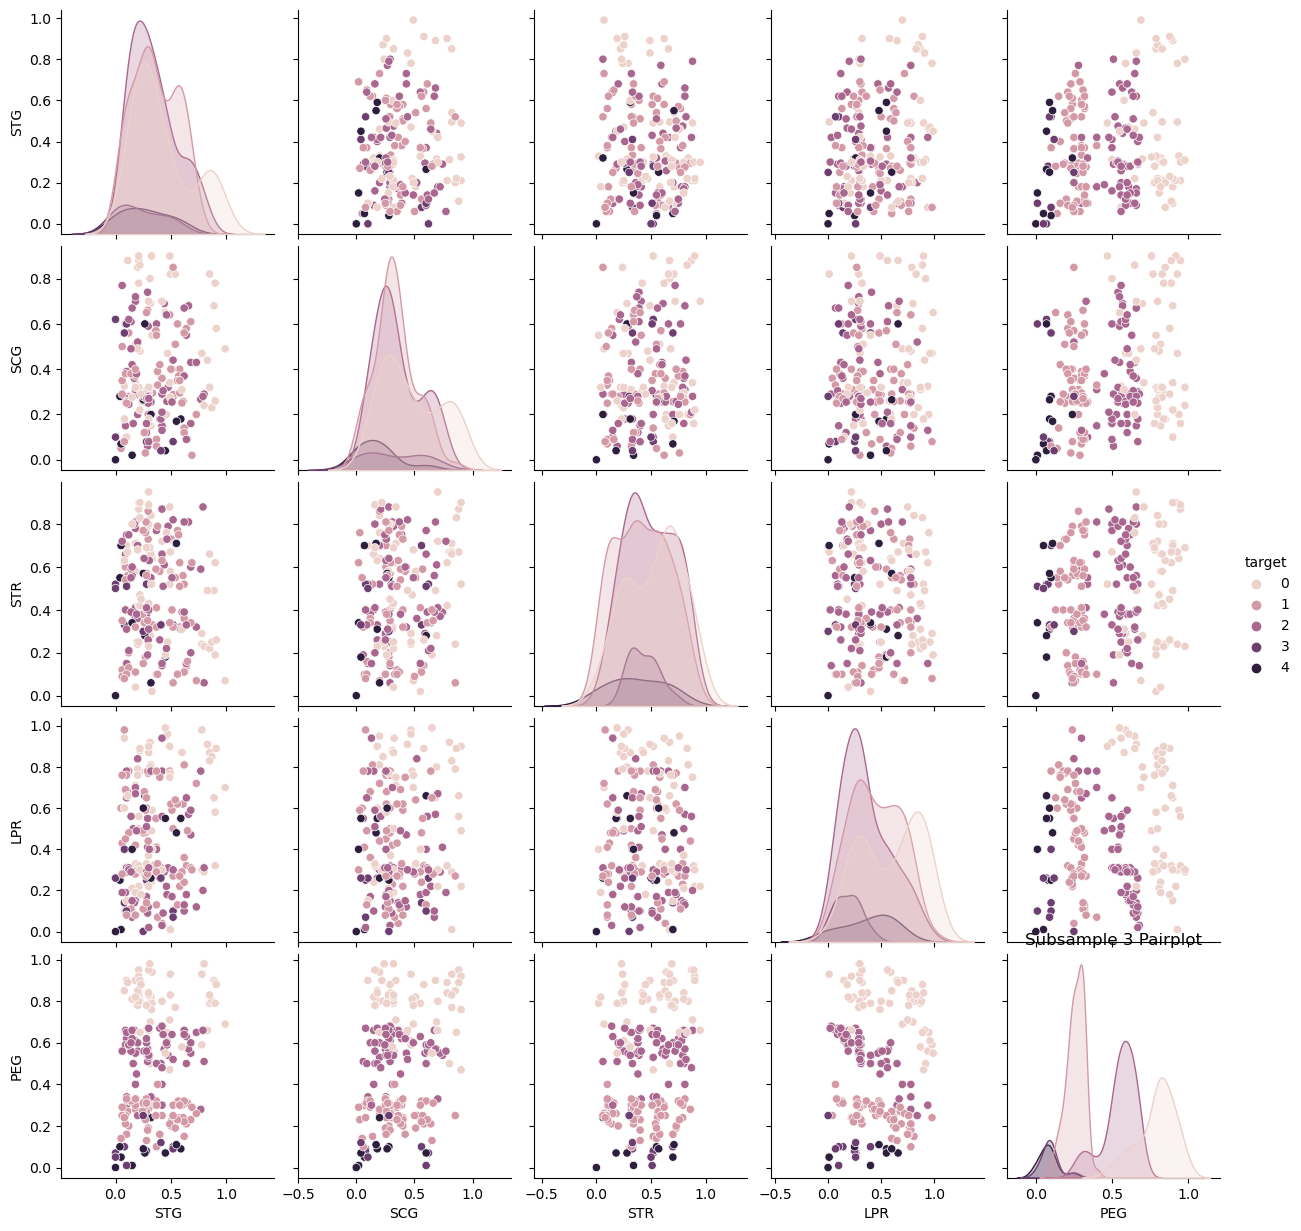

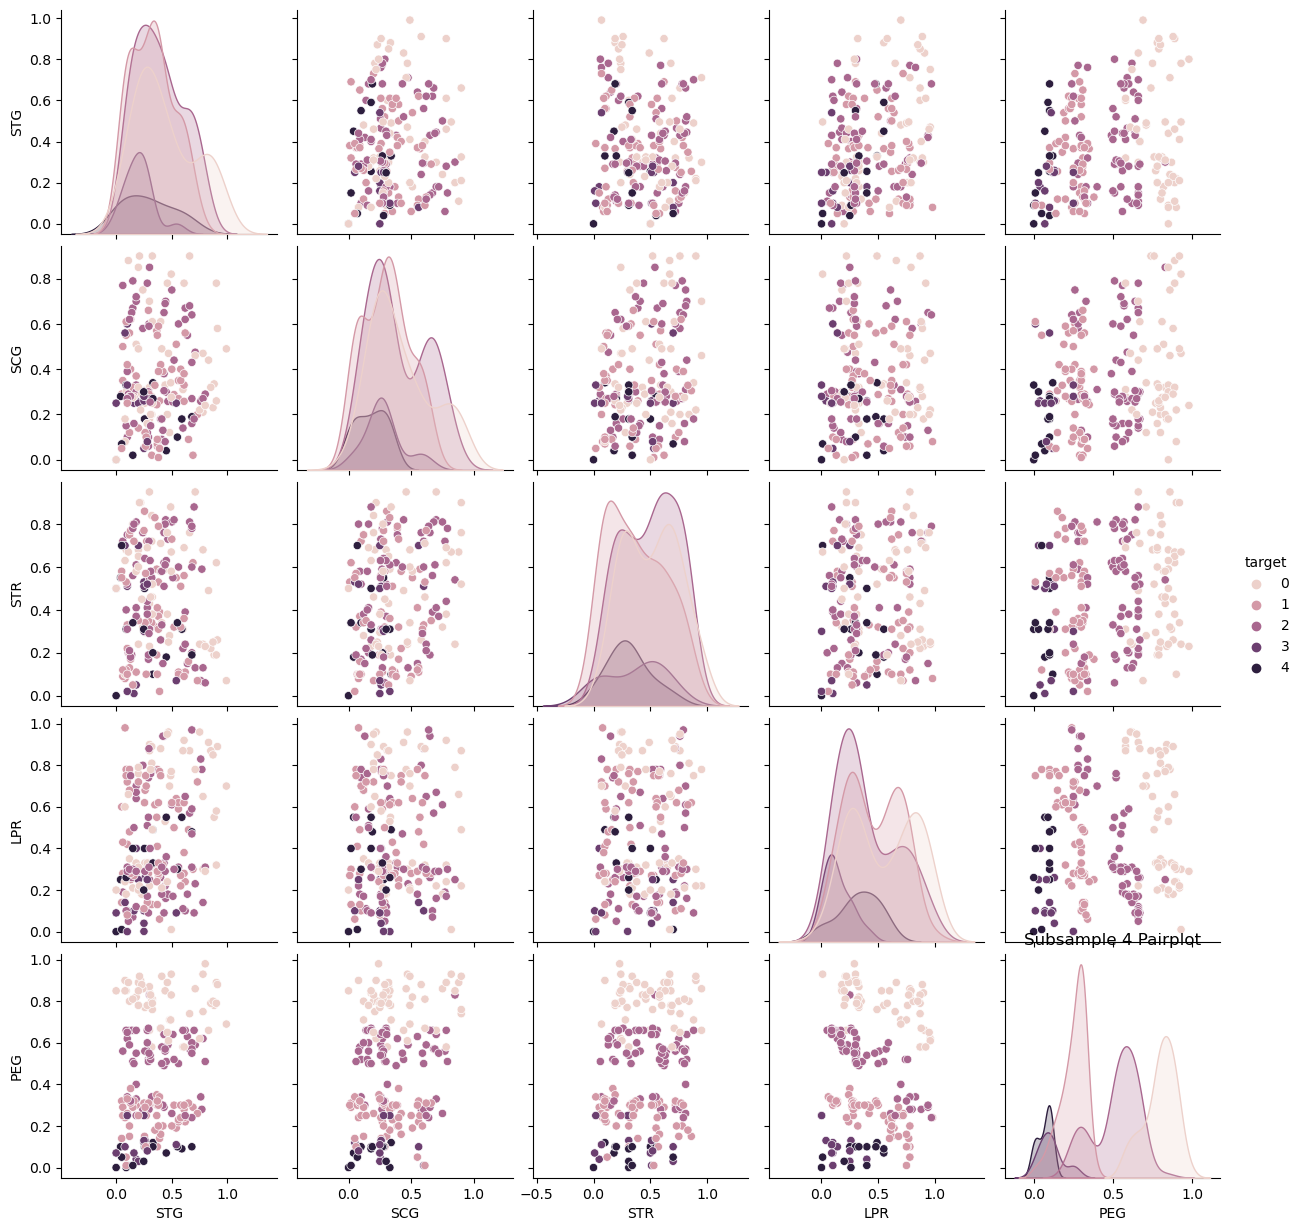

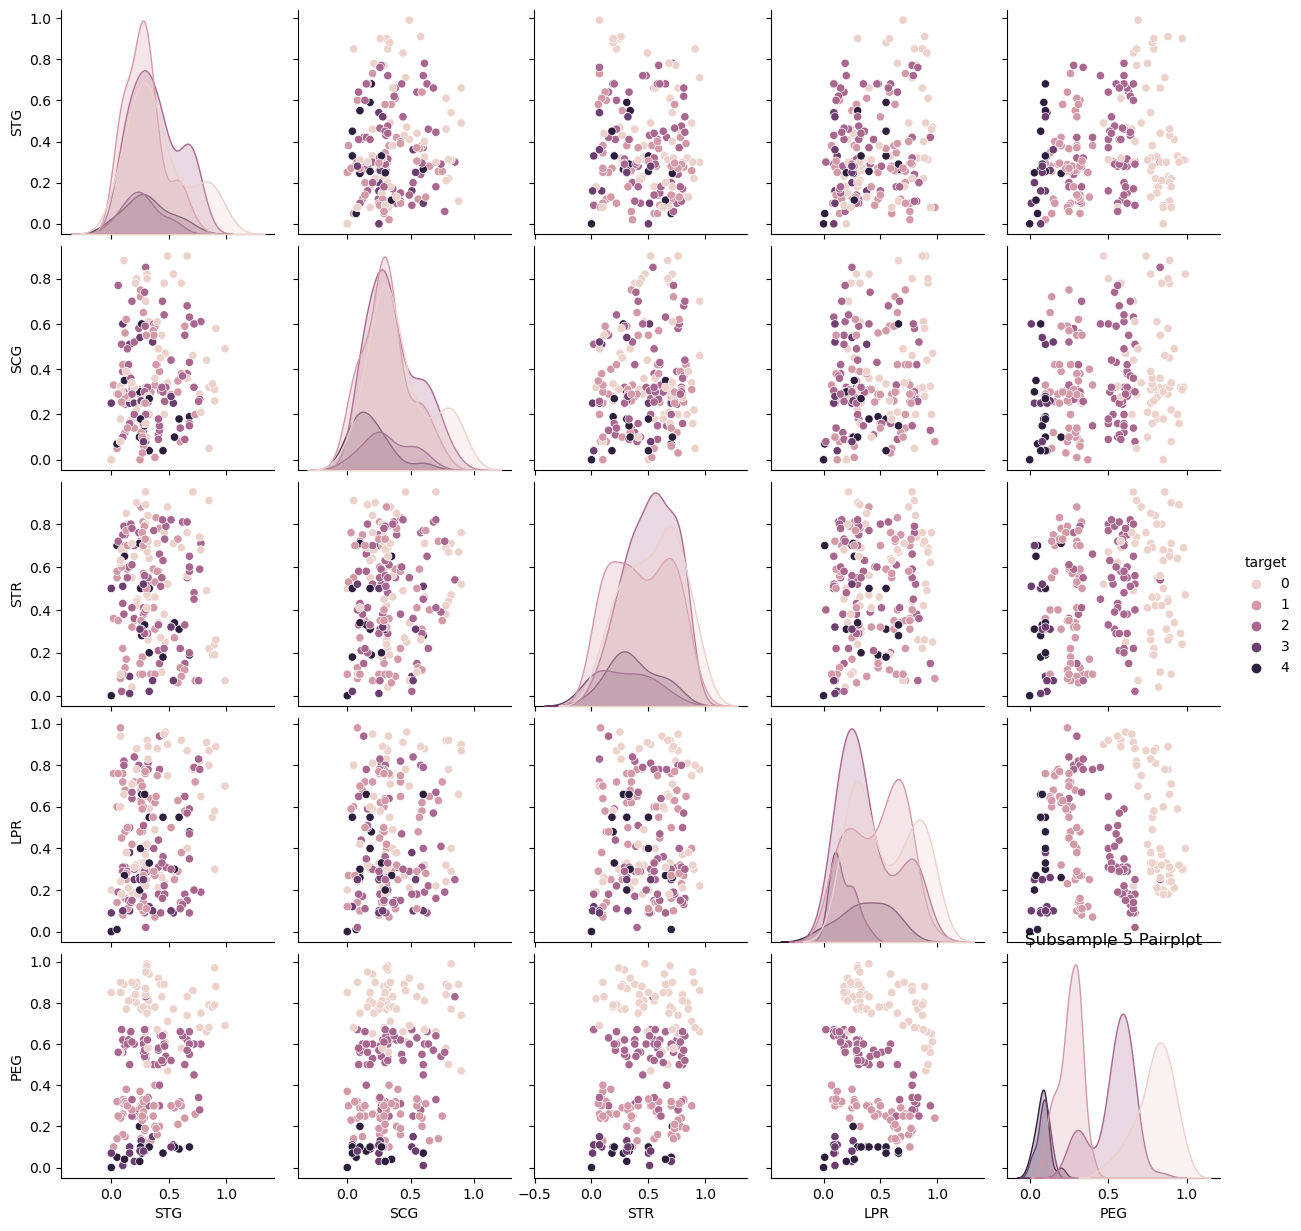

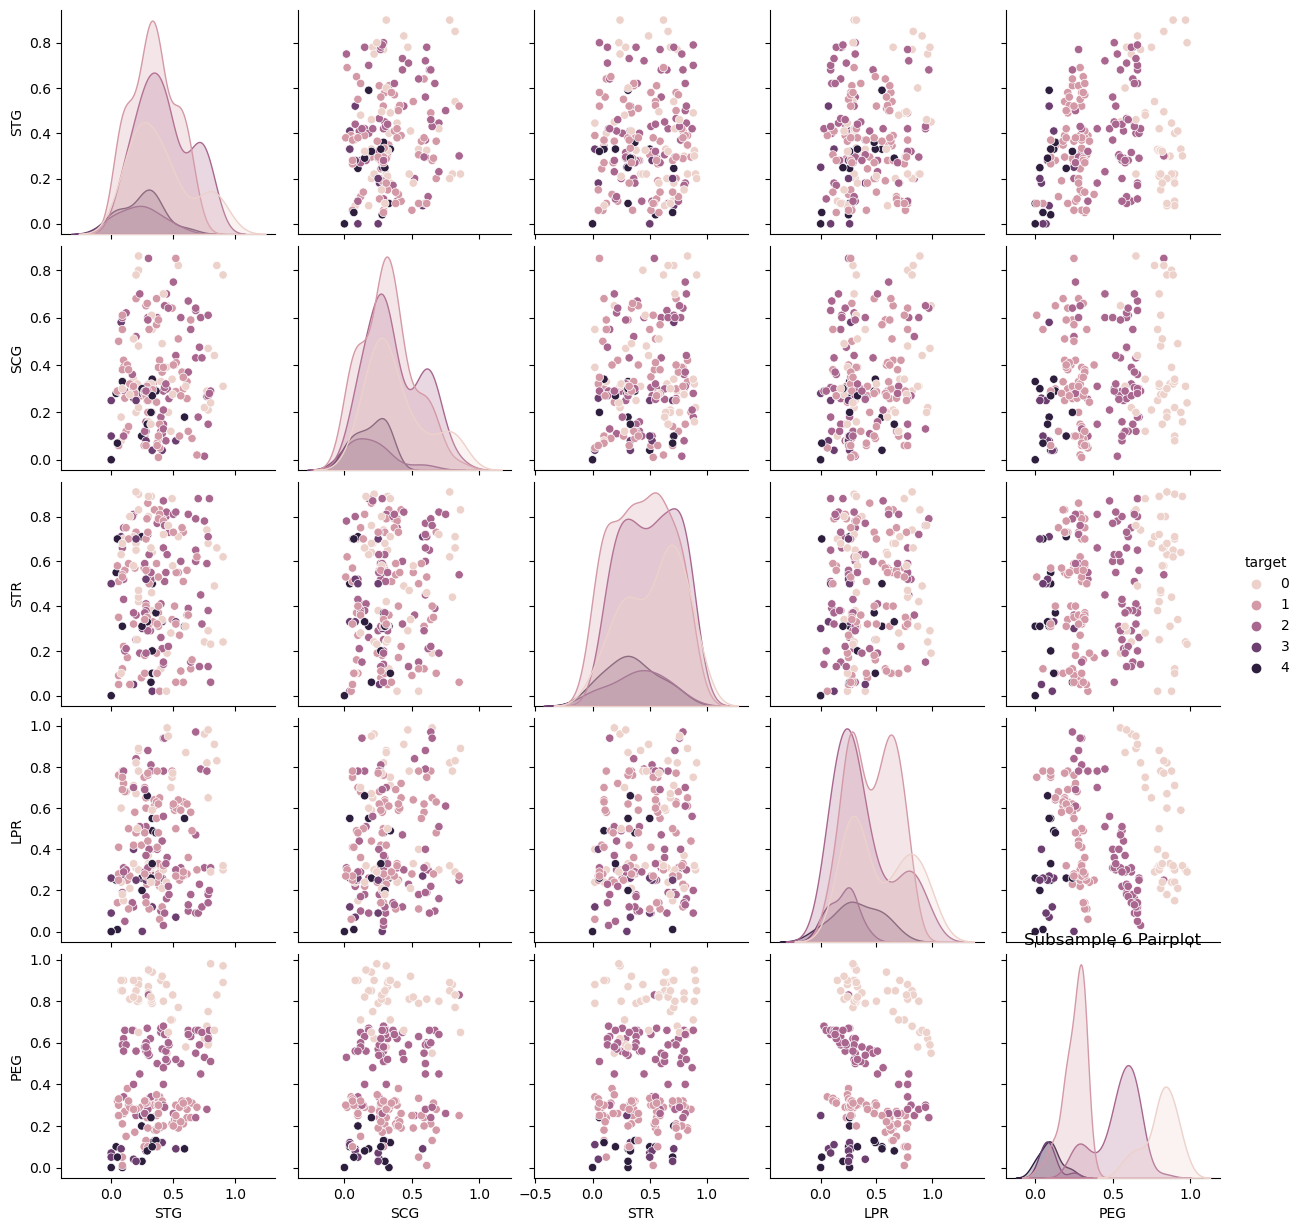

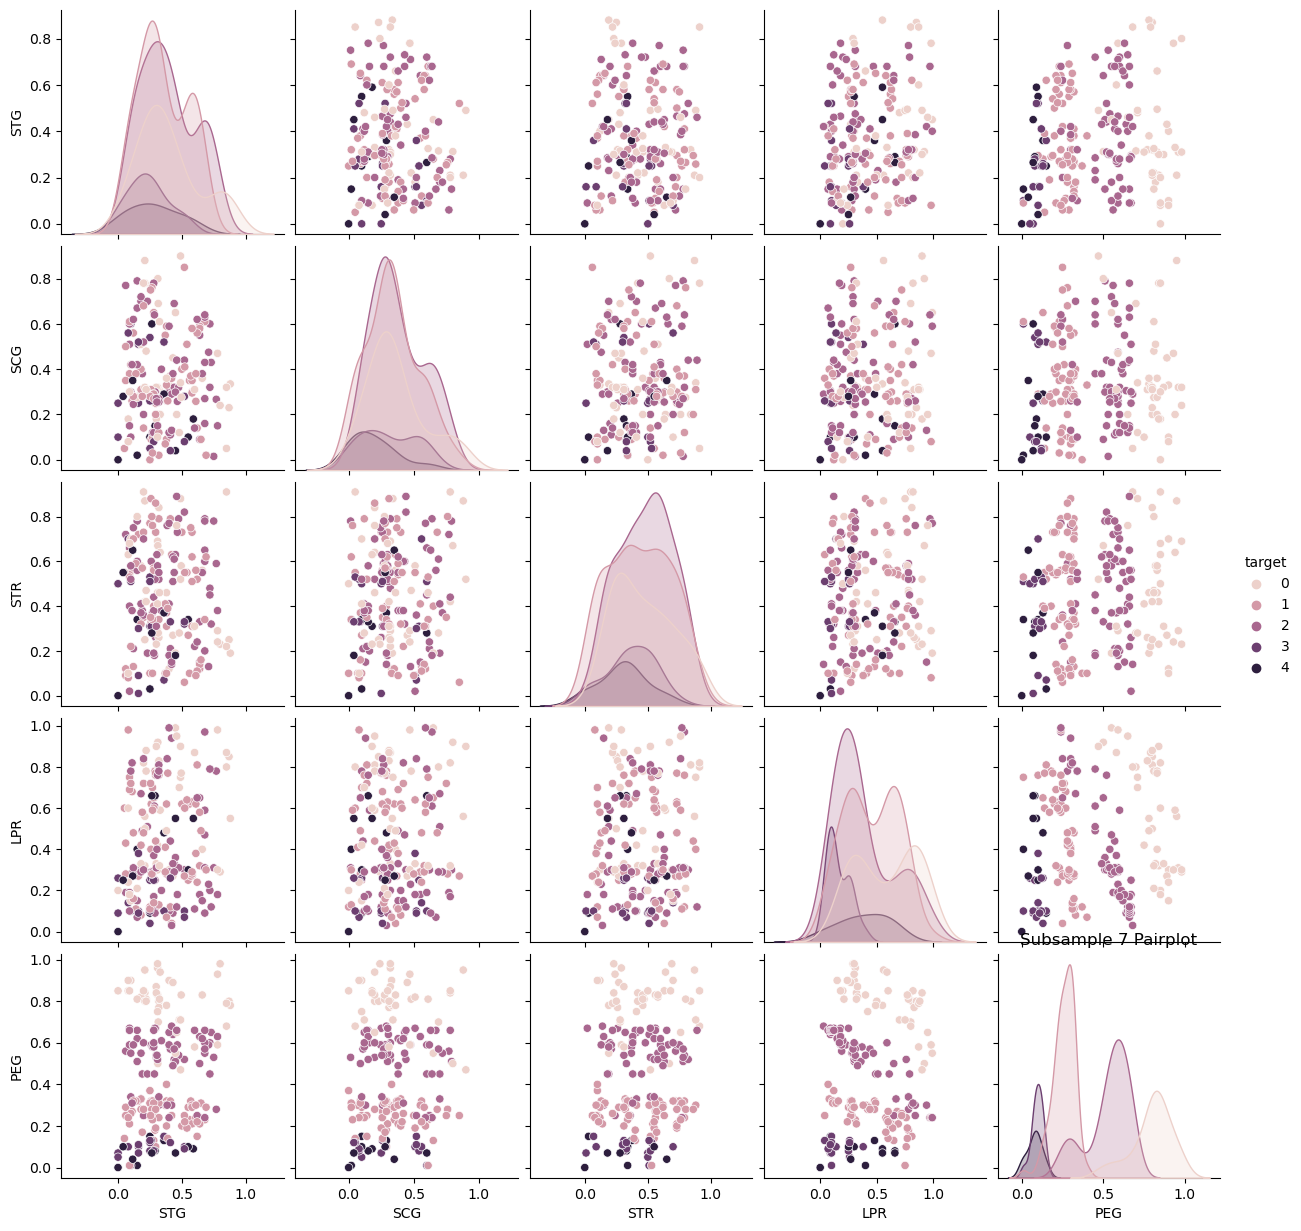

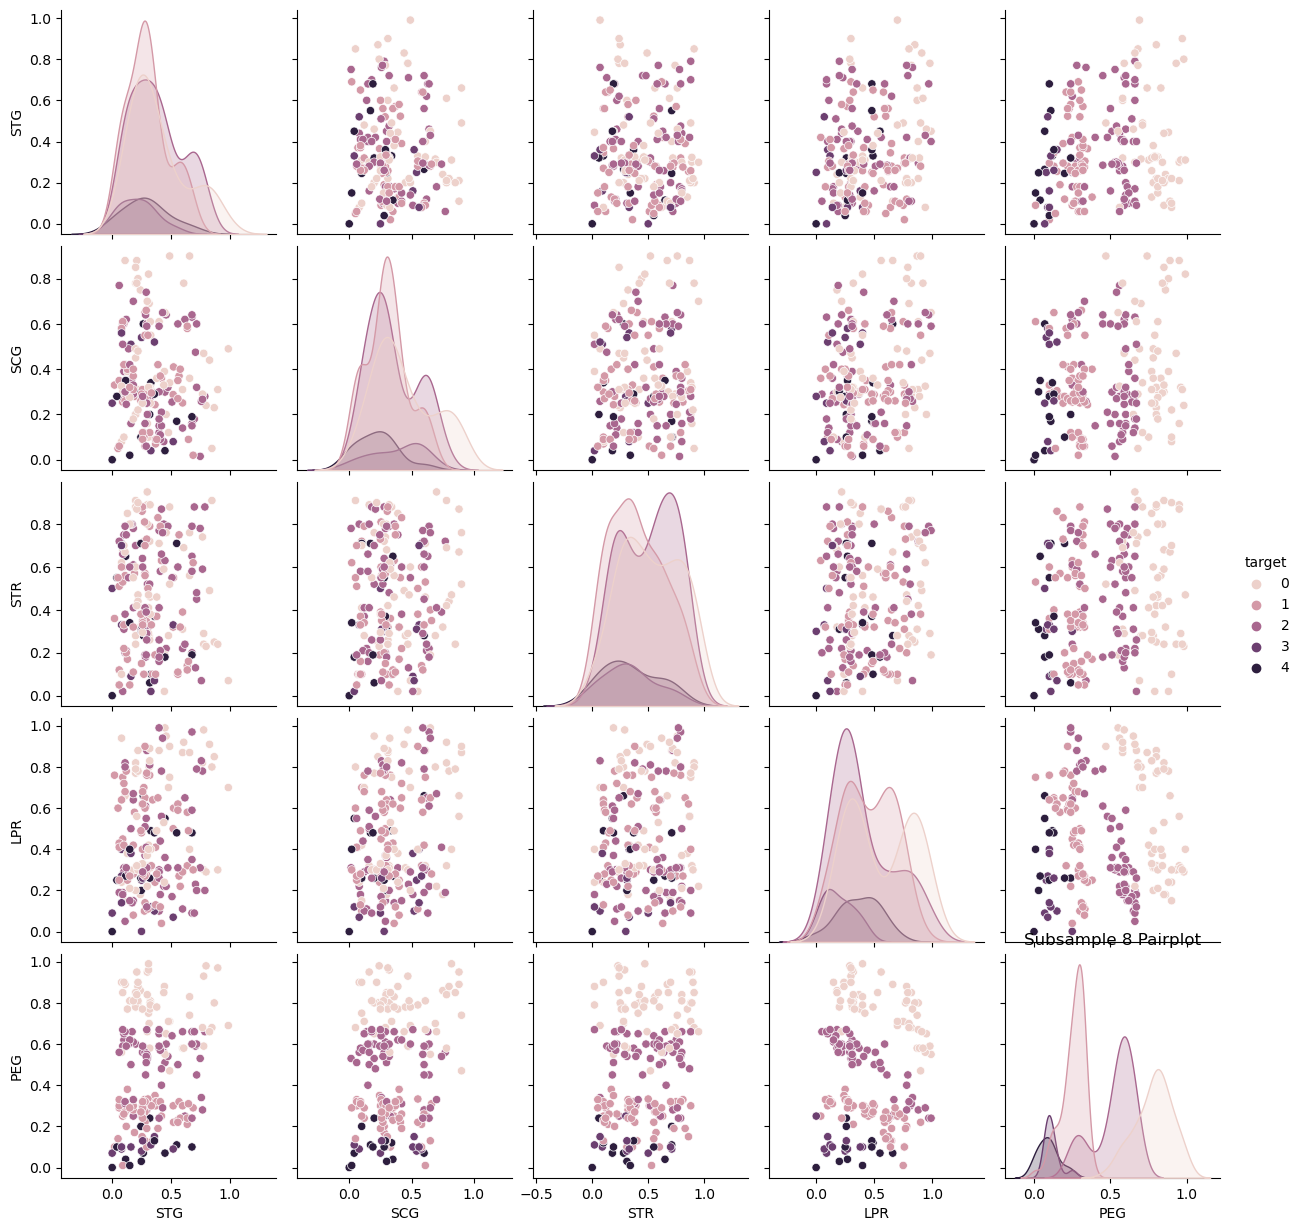

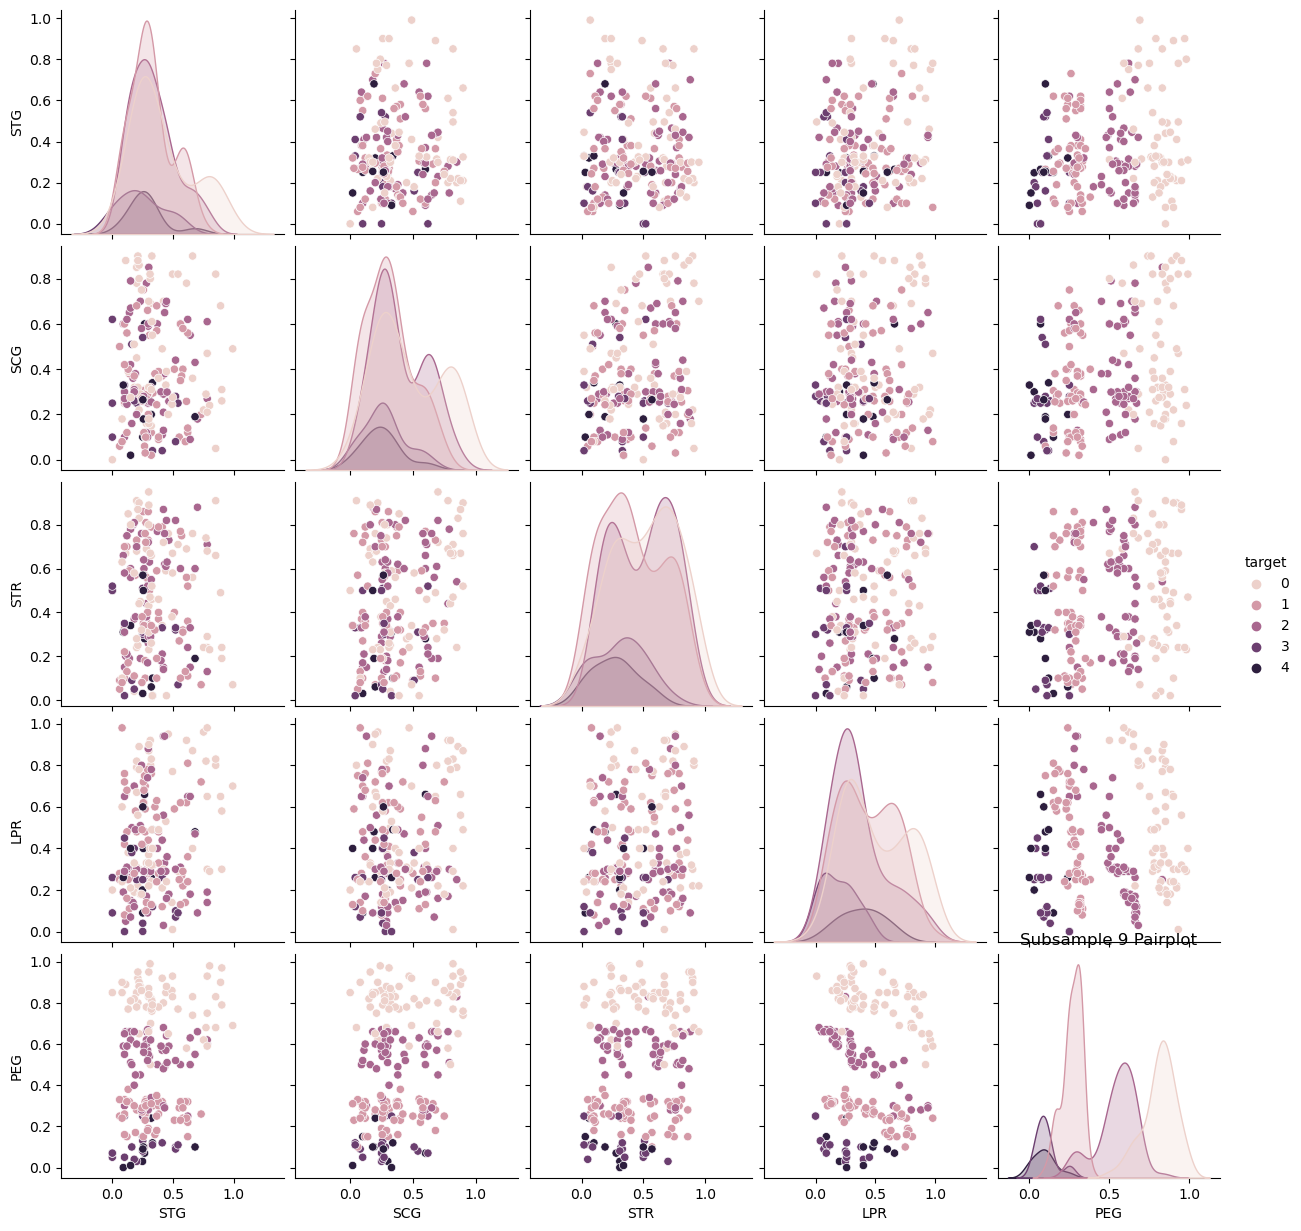

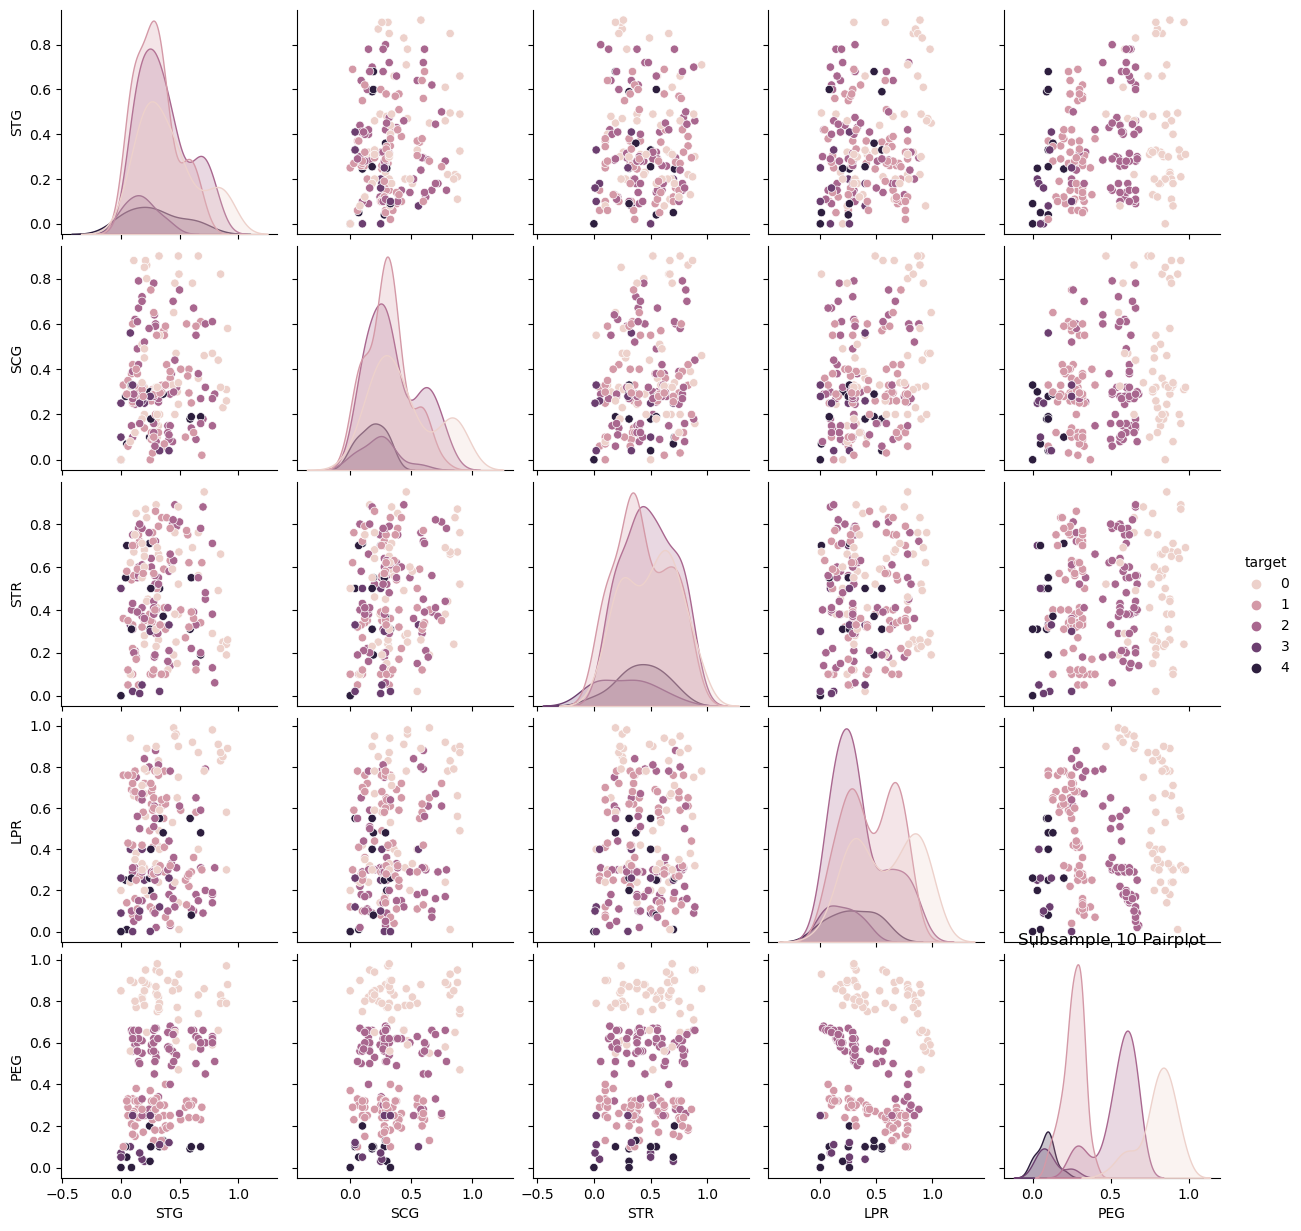

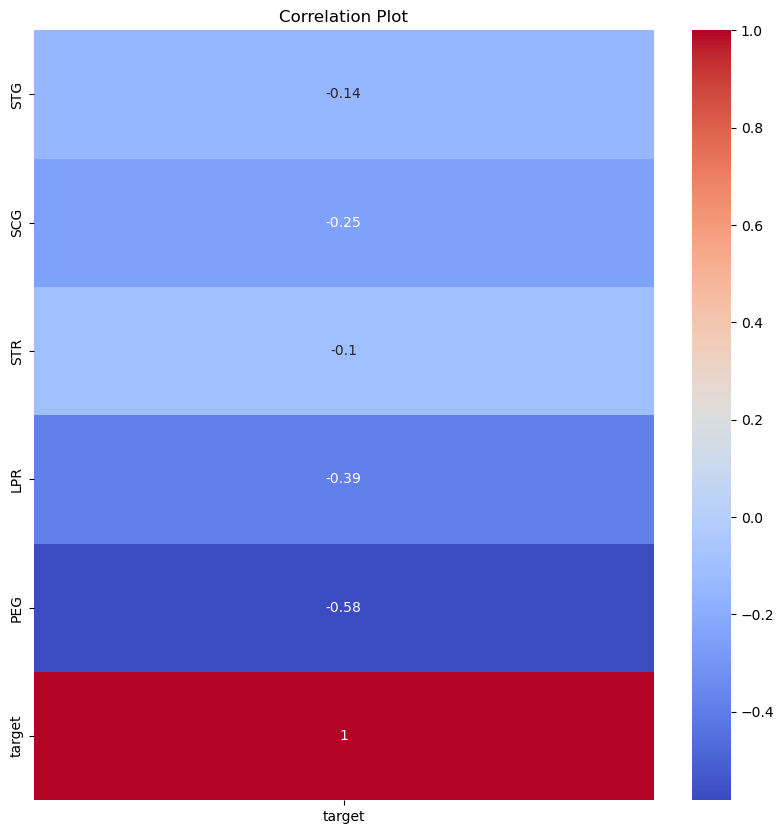

In [4]:
# TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    df = pd.DataFrame(X_train)
    df['target'] = y_train
    sns.pairplot(df, hue='target')
    plt.title(f'Subsample {i+1} Pairplot')
    plt.show()

#**TASK: Create a heatmap of the correlation between the variables and the target variable.**
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[['target']], annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()



**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

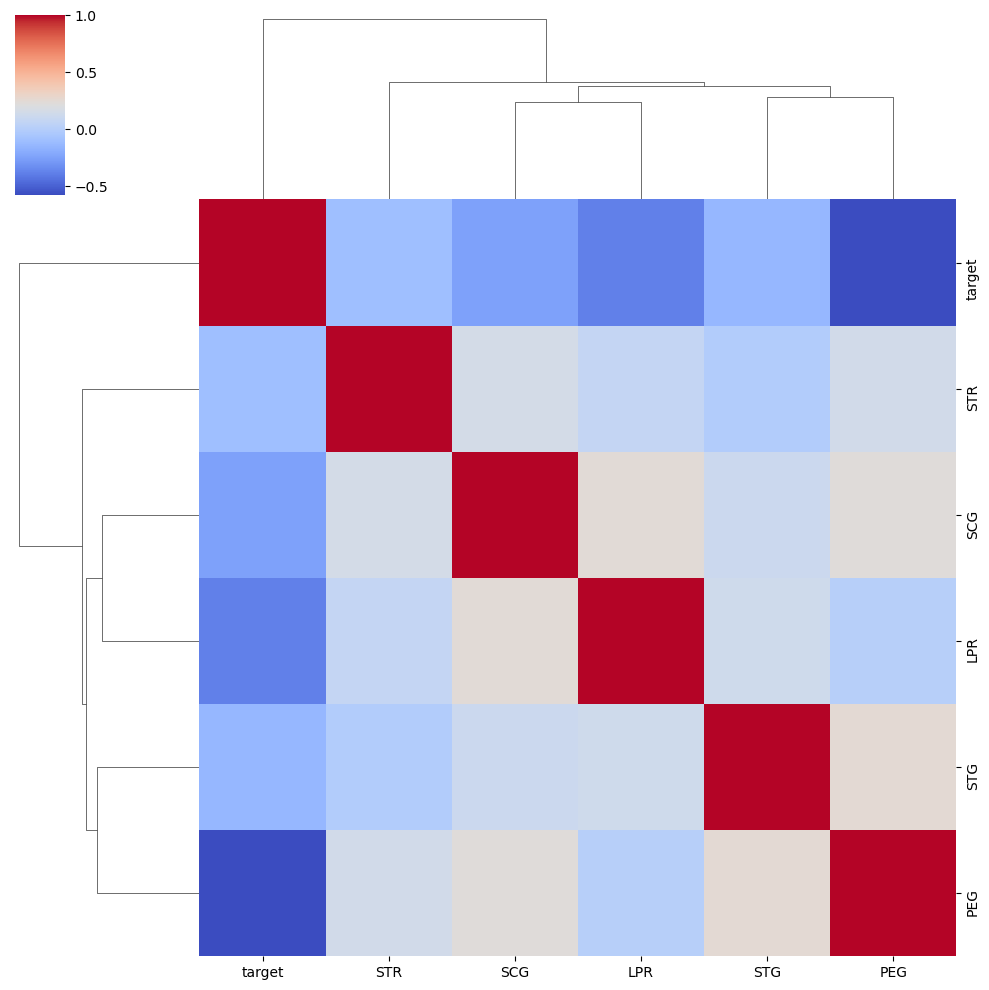

In [5]:
##TASK: Create a clustermap with seaborn to explore the relationships between variables.
sns.clustermap(corr, cmap='coolwarm')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [6]:
#TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('BASE MODEL')
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

print('GRID SEARCH MODEL')
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))


BASE MODEL
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.92      1.00      0.96        36
           2       0.97      0.95      0.96        39
           3       0.60      0.86      0.71         7
           4       0.50      0.17      0.25         6

    accuracy                           0.93       121
   macro avg       0.80      0.79      0.77       121
weighted avg       0.92      0.93      0.92       121

[[32  0  1  0  0]
 [ 0 36  0  0  0]
 [ 0  2 37  0  0]
 [ 0  0  0  6  1]
 [ 0  1  0  4  1]]
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.404 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   0.0s
[CV 5/5] END ........C=